In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

In [2]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
df = pd.DataFrame(data=diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
# X,y data 지정
X = df[['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']].values
y = df['target'].values
# removed sex

In [5]:
print(X.shape)
print(y.shape)

(442, 9)
(442,)


In [6]:
for i,feature_name in enumerate(diabetes.feature_names):
  print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=40)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(287, 9) (287,)
(155, 9) (155,)


In [8]:
W = np.random.rand(9)
b = np.random.rand()

In [9]:
W

array([0.9494297 , 0.12517451, 0.87680904, 0.40722202, 0.38842664,
       0.25354477, 0.40357642, 0.11875251, 0.04851771])

In [10]:
b

0.048920507122495516

In [11]:
#모델설정
def model(X, W, b):
    predictions = 0
    for i in range(9):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [12]:
# 손실함수
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [13]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [14]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [15]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.36930005 -4.29157763 -3.22715716 -1.54615051 -1.26859321  2.89009417
 -3.14762329 -4.13962721 -2.79681976]
db: -304.16912731154684


In [16]:
LEARNING_RATE = 0.01

In [17]:
losses = []

for i in range(1, 35500):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 20602.4922
Iteration 20 : Loss 15680.9427
Iteration 30 : Loss 12392.8239
Iteration 40 : Loss 10195.1916
Iteration 50 : Loss 8725.5763
Iteration 60 : Loss 7741.9932
Iteration 70 : Loss 7082.8928
Iteration 80 : Loss 6640.4250
Iteration 90 : Loss 6342.5886
Iteration 100 : Loss 6141.3158
Iteration 110 : Loss 6004.5164
Iteration 120 : Loss 5910.7670
Iteration 130 : Loss 5845.7652
Iteration 140 : Loss 5799.9628
Iteration 150 : Loss 5766.9853
Iteration 160 : Loss 5742.5771
Iteration 170 : Loss 5723.8972
Iteration 180 : Loss 5709.0488
Iteration 190 : Loss 5696.7656
Iteration 200 : Loss 5686.2023
Iteration 210 : Loss 5676.7944
Iteration 220 : Loss 5668.1651
Iteration 230 : Loss 5660.0628
Iteration 240 : Loss 5652.3195
Iteration 250 : Loss 5644.8231
Iteration 260 : Loss 5637.4987
Iteration 270 : Loss 5630.2961
Iteration 280 : Loss 5623.1821
Iteration 290 : Loss 5616.1342
Iteration 300 : Loss 5609.1375
Iteration 310 : Loss 5602.1820
Iteration 320 : Loss 5595.2610
Iteration 330

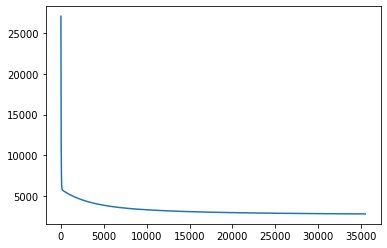

In [18]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [19]:
W, b

(array([   5.71952597,  480.24856594,  270.31431545,  -49.82868445,
        -124.20431738, -208.90705032,  113.33251559,  414.97837954,
         101.16307721]),
 151.4973319184713)

In [20]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3457.8737621196756

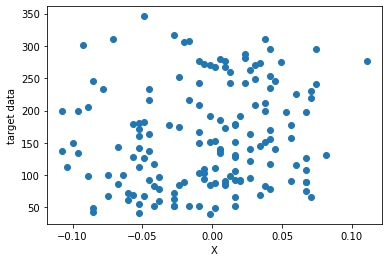

In [21]:
# x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터
plt.scatter(X_test[:,0], y_test)
plt.xlabel('X')
plt.ylabel('target data')
plt.show()